## CIFAR-10 dataset: Model built using Functional API
### 1) Applied Normal Convolution [ 3x3 ]
### 2) Applied Spatially Separable Convolution
### 3) Applied Depthwise Separable Convolution
### 4) Applied Grouped Convolution with 3x3 and 5x5 kernels
### 5) Applied Grouped Convolution with 3x3 (dilation=1) and 3x3 (dialation=2)
### 6) Got validation accuracy (87.25%) for Functional API model and the base accuracy was (83.42%) in 50 epochs. 

####Importing numpy package and importing keras modules Sequential (layers placed one after other linearly), Flatten (Data format will be changed to 1D), Convolutions2D (Provides convolutional layer in 2D spatial domain), Dropout(randomly sets some of the weights to 0 to prevent overfitting), Activation(provides activation functionality), Maxpooling2D (passes the maximum value within a kernel region to next layer). Also importing Model, Input for functional API based model. Importing SeperableConv2D for depthwise convolution.

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Input, concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


### Importing the CIFAR-10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

### Considering the class names and plotting 1 image per each class

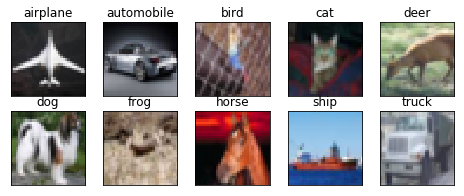

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Function for plotting model performance history

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Defining accuracy function to compute accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Pixel normalization is done and both training and testing labels are converted into categorical type

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Pre-defined model

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

### Pre-defined model summary

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

### Pre-defined model training. Loss function is selected along with adam optimizer.

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 12s 31ms/step - loss: 1.8425 - acc: 0.2958 - val_loss: 1.4165 - val_acc: 0.4751
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3461 - acc: 0.5117 - val_loss: 1.1218 - val_acc: 0.5951
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1247 - acc: 0.6033 - val_loss: 0.9920 - val_acc: 0.6387
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 1.0004 - acc: 0.6472 - val_loss: 0.8878 - val_acc: 0.6889
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9001 - acc: 0.6864 - val_loss: 0.8344 - val_acc: 0.7118
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8329 - acc: 0.7127 - val_loss: 0.7520 - val_acc: 0.7432
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7663 - acc: 0.7370 - val_loss: 0.6897 - val_acc: 0.7607
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

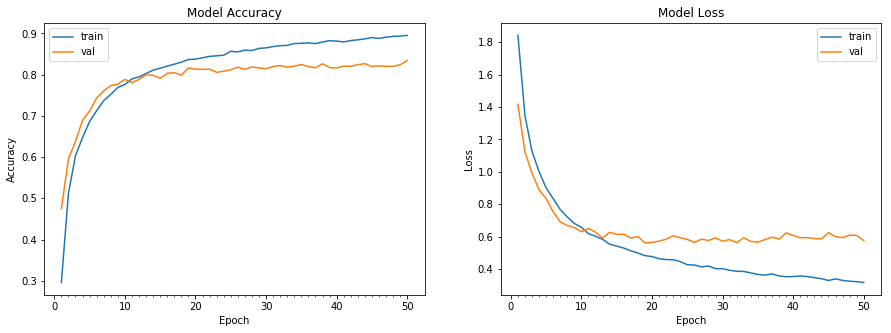

Accuracy on test data is: 83.42


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Maximum validation accuracy achieved by base pre-defined model is 83.42% in 50 epochs

### Modified New model with functional API levaraging Normal, Spatially Separable, Depthwise Separable & Grouped Convolutions

In [0]:
# Defining the model

#Input Defined as x0
x0=Input(shape=(32, 32, 3))

#Normal Convolution
x1=Conv2D(64, (3, 3), padding='same', activation='relu')(x0)#32x32
x1=BatchNormalization()(x1)

#Spatially Seperable Convolution with 3x1 followed by 1x3
x2=Conv2D(128, (3, 1), activation='relu')(x1)#30x32
x3=Conv2D(128, (1, 3), activation='relu')(x2)#30x30
x3=BatchNormalization()(x3)
x3 = Dropout(0.25)(x3)

#Depthwise Seperable Convolution
x4=SeparableConv2D(128, (3, 3), padding="same")(x3)#30x30
x4=BatchNormalization()(x4)

#Grouped Convolution using two 3x3 kernels on x4
x5=Conv2D(256, (3, 3), activation='relu')(x4)#28x28
x5=BatchNormalization()(x5)

x5=Conv2D(256, (3, 3), activation='relu')(x5)#26x26
x5=BatchNormalization()(x5)

#Grouped Convolution using 5x5 kernel on x4
x6=Conv2D(256, (5, 5), activation='relu')(x4)#26x26
x6=BatchNormalization()(x6)

#Concatenating Groupwise convolution outputs
x7=concatenate([x5, x6])

# Applying 1x1 to reduce channels and then reducing computations through MaxPooling
x8=Conv2D(64, (1, 1), activation='relu')(x7)#26x26
x9=MaxPooling2D((2, 2))(x8)#13x13

#Grouped Convolution using two 3x3 kernel with dialation 1
x10=Conv2D(128,(3, 3),activation='relu', dilation_rate=(1, 1))(x9)#11x11
x10=BatchNormalization()(x10)

x10=Conv2D(128,(3, 3),activation='relu', dilation_rate=(1, 1))(x10)#9x9
x10=BatchNormalization()(x10)

#Grouped Convolution using 3x3 kernel with dialation 2
x11=Conv2D(128,(3, 3),activation='relu', dilation_rate=(2, 2))(x9)#9x9
x11=BatchNormalization()(x11)

#Concatenating Groupwise convolution outputs
x12=concatenate([x10, x11])

# Applying 1x1 to reduce channels and then reducing computations through MaxPooling
x13=Conv2D(64, (1, 1), activation='relu')(x12)#9x9
x14=MaxPooling2D((2, 2))(x13)#4x4

# Applying 4x4 filter at the last before layer
x15=Conv2D(10, (4, 4), activation='relu')(x14)
x15=BatchNormalization()(x15)

#Flattening the output and applying softmax
seq = Flatten()(x15)
predictions = Activation('softmax')(seq)


### Modified model summary

In [11]:
model1 = Model(inputs=x0, outputs=predictions)
model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 30, 32, 128)  24704       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_9 (

### Loss function is selected along with adam optimizer. Adaptive learning rate is used. Model to be saved when the validation accuracy is highest among the 50 epochs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 86s 219ms/step - loss: 1.4131 - acc: 0.5145 - val_loss: 1.3223 - val_acc: 0.5685

Epoch 00001: val_acc improved from -inf to 0.56850, saving model to .mdl_wts.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 82s 211ms/step - loss: 0.9506 - acc: 0.6952 - val_loss: 1.0534 - val_acc: 0.6603

Epoch 00002: val_acc improved from 0.56850 to 0.66030, saving model to .mdl_wts.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 80s 206ms/step - loss: 0.7690 - acc: 0.7538 - val_loss: 0.9750 - val_acc: 0.6775

Epoch 00003: val_acc improved from 0.66030 to 0.67750, saving model to .mdl_wts.hdf5
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [===========================

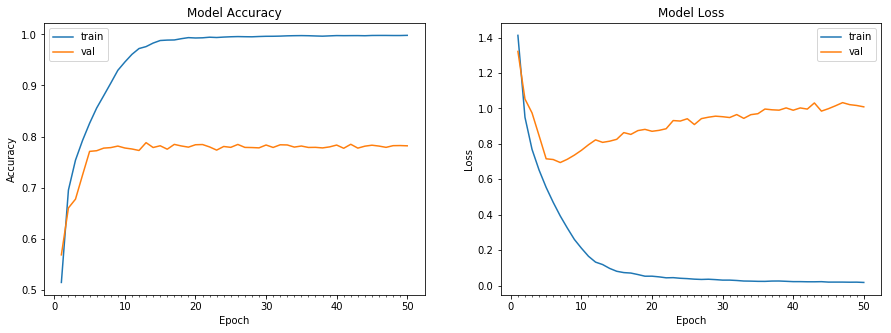

Accuracy on test data is: 78.19


In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Compile the model
model1.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', verbose=1)

# train the model
start = time.time()
# Train the model
model_info1 = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[mcp_save,LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info1)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

##Validation accuracy of Functional API model code is 78.81% 